# Data Visualization

## Primary focus on Seaborn and Matplotlib
Quick reference for data visualization code

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
sns.set_theme()

## Visualizing relationships between two variables

**relplot()**

kind='scatter' or kind='line'

In [3]:
df = sns.load_dataset('tips')

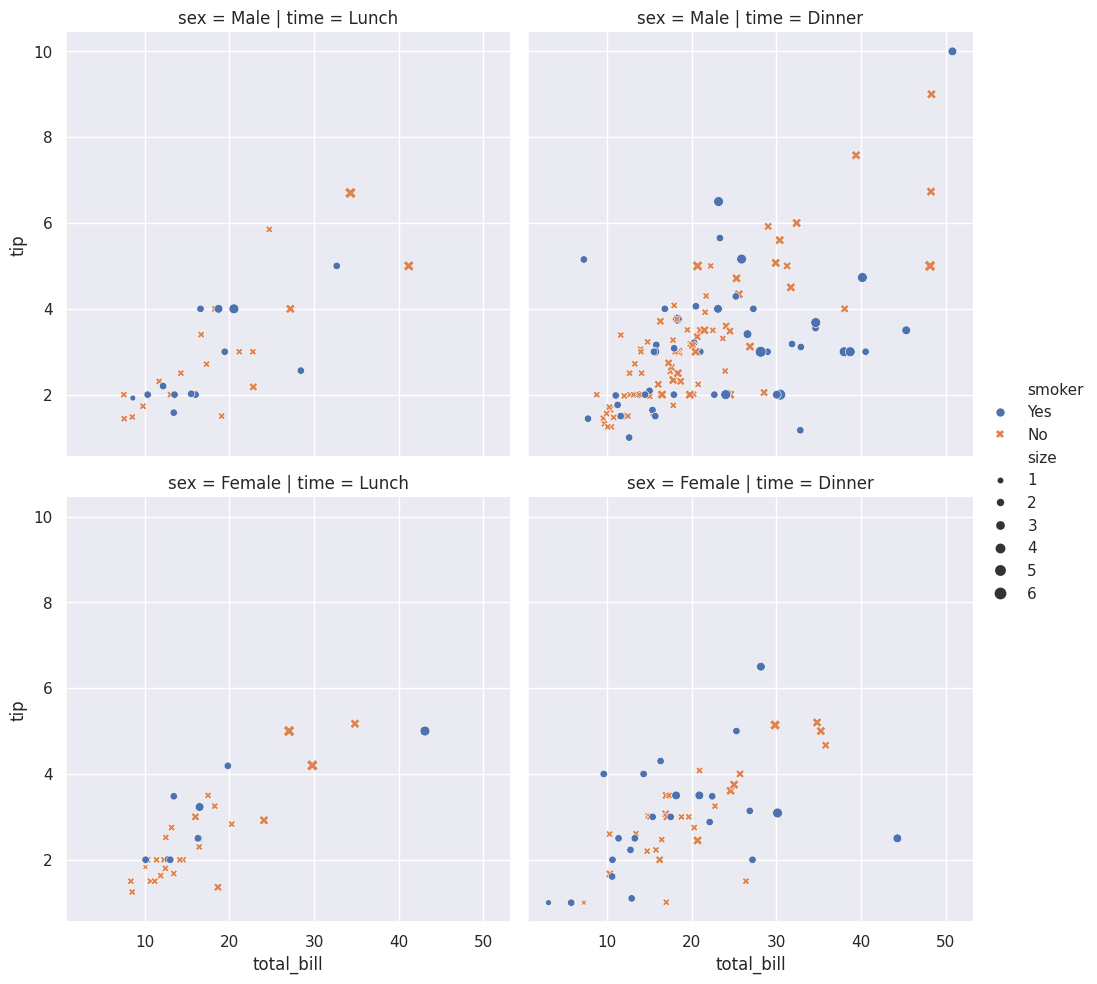

In [4]:
sns.relplot(data=df, x='total_bill', y='tip'
           , hue='smoker', style='smoker', size='size'     # style elements to add variety/differentiation to the plot 
           , row='sex', col='time'                         # facetting the plot based on categorical variables
           )

In [5]:
df2 = sns.load_dataset('dots')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB


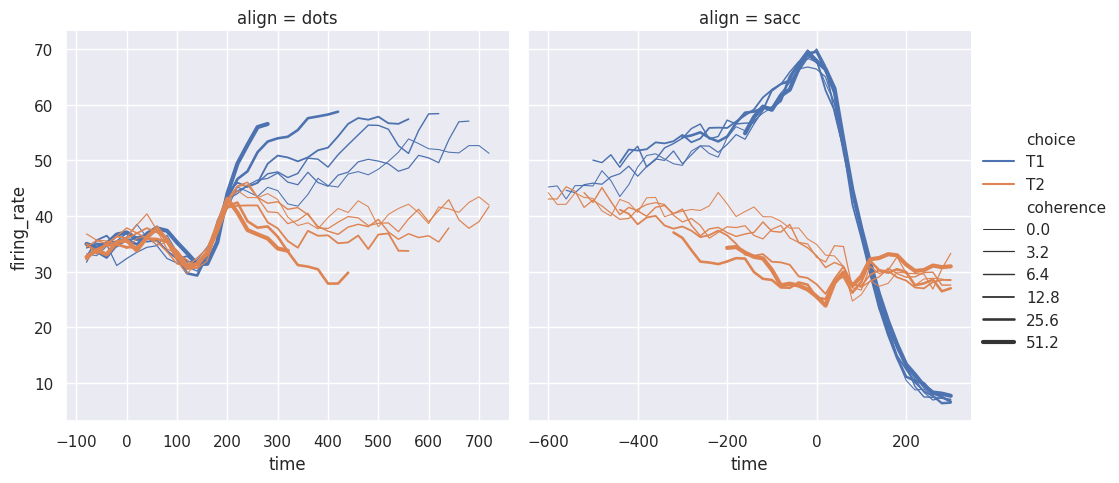

In [7]:
sns.relplot(
    data=df2, x='time', y='firing_rate'
    , hue='choice', size='coherence'
    , col='align'
    , kind = 'line'
    , facet_kws=dict(sharex=False, sharey=True)
)

# params={
#     'title': 'Line plot (trend) for dots data set'
#     , 'xlabel': 'Time', 'ylabel': 'firing_rate'
#     , 'xlim':[-100,800], 'ylim':[20,70]
# }

# plt.set(**params)

## Statistical estmation

In [8]:
df3 = sns.load_dataset('fmri')

In [9]:
df3.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


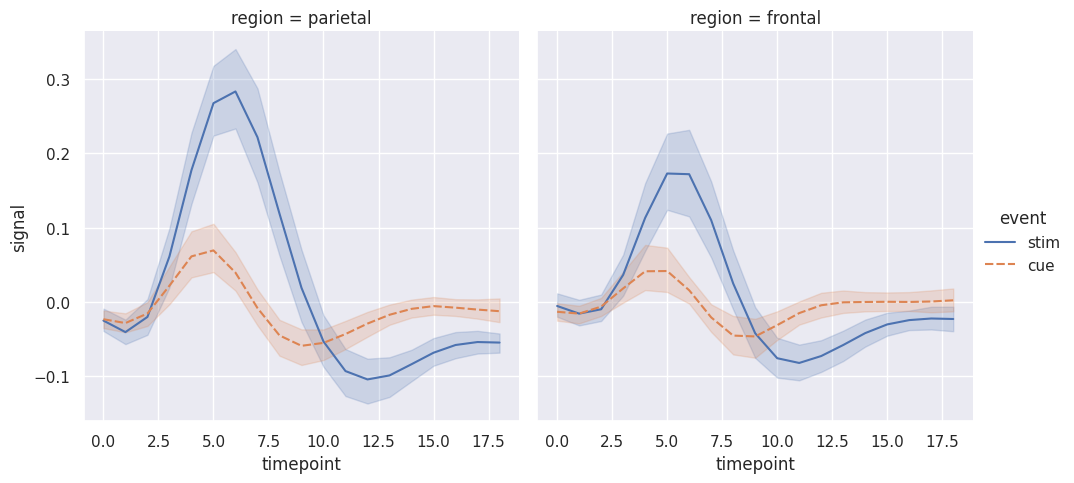

In [10]:
g = sns.relplot(data=df3
                , x='timepoint', y='signal'
                , hue='event', style='event'
                , col='region'
                , kind='line'
               )

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

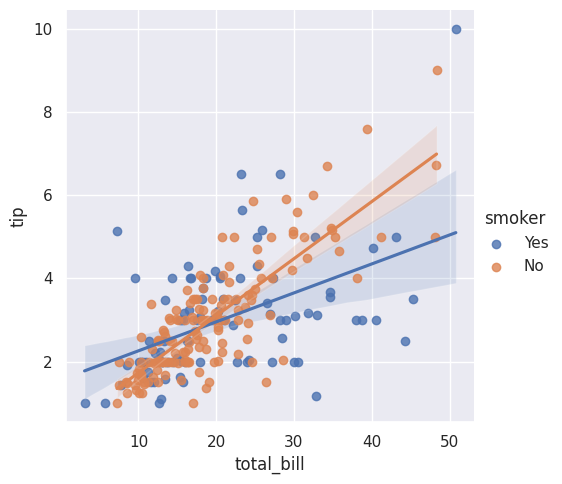

In [11]:
## Lmplot adds regression lines to an existing scatterplot, along with the confidence bands along the regression line estimated by the hotelling (??) method

sns.lmplot(data=df, x='total_bill', y='tip'
          , hue='smoker'
           # , col='sex', row='time'
          )

## Visualizing Distributions

### Key family of plots for Statistical distributions is: displot()

There are three kinds of distribution plots available here -- use the 'kind' key word:
1. Histogram: **kind='hist'**
2. KDE (Kernel Density Estimation): **kind='kde'**
3. ECDF (Emperical Cumulative Distribution Function): **kind='ecdf'**

'hue' will work to split up distributions by a categorical variable. However, 'style' & 'size' parameters will not work

Additionally for histograms, i.e. kind='hist', we can pass the kde=True argument to get both bars and a smooth curve

'facet_kws' is a useful parameter to pass generally used to given args such as sharex, sharey etc.

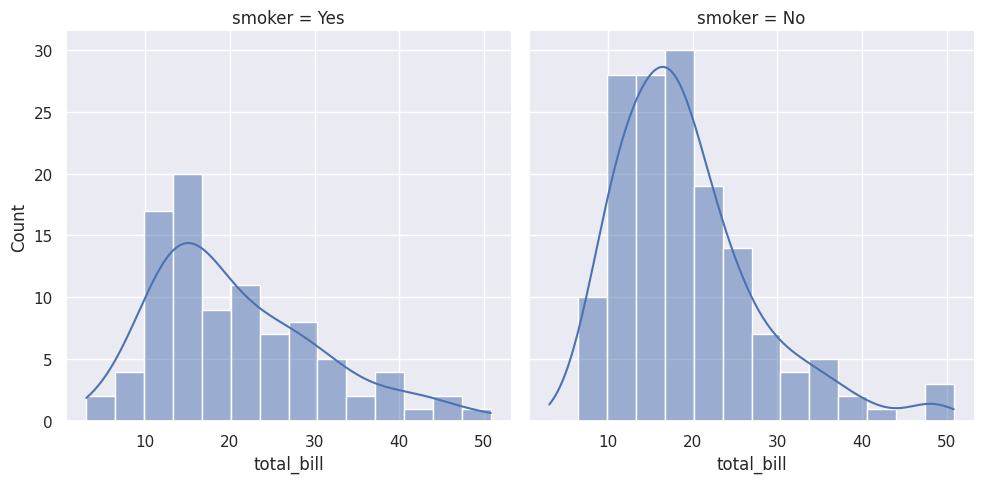

In [12]:
g = sns.displot(data=df
               , x='total_bill'
               , col='smoker'
               , kind='hist', kde=True
               , facet_kws=dict(sharex=False)
               )

## Categorical Plots: catplot()

**Categorical scatterplots:**
* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

**Categorical distribution plots:**
* boxplot() (with kind="box")
* violinplot() (with kind="violin")  --split=True gives an interesting plot
* boxenplot() (with kind="boxen")

**Categorical estimate plots:**
* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")

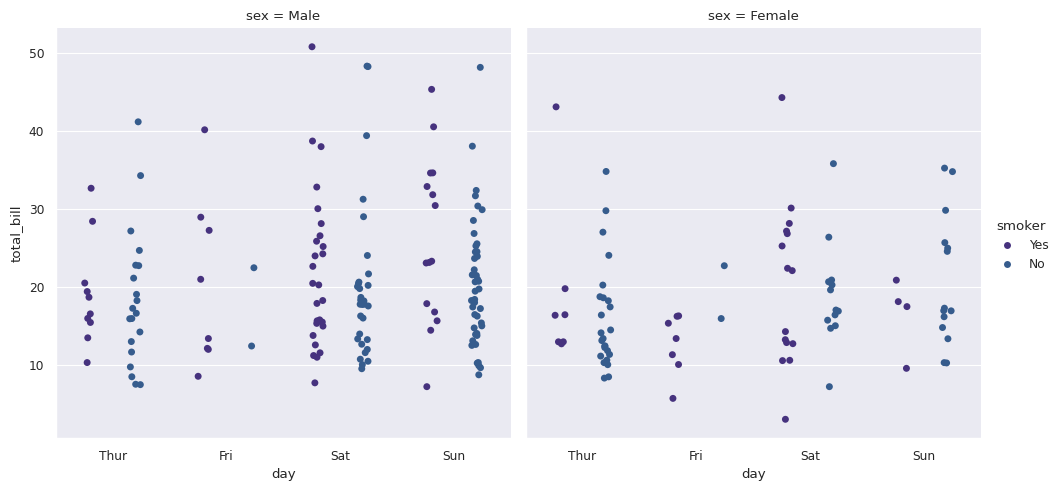

In [78]:
## Scatterplots split by a categorical variable
#### stripplot is just a scatter plot aplit by the categorical variable of interest
#### swarmplot is just a scatter plot where the dots do not overlap

g = sns.catplot(data=df
               , x='day', y='total_bill', hue='smoker'
               , col='sex'
               , kind='strip'
               , jitter=True, dodge=True
               , 
               )

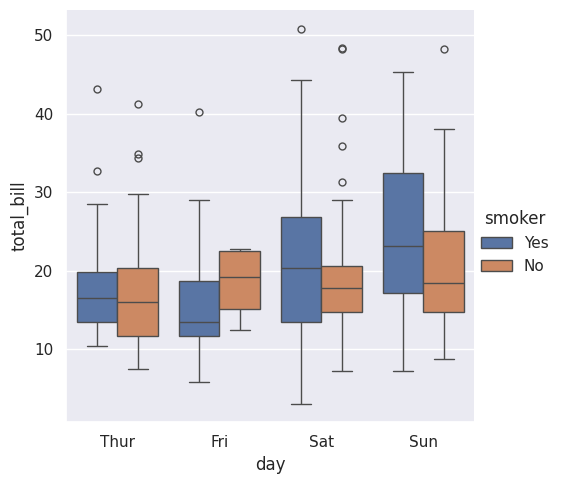

In [14]:
## Distribution plots available in the catplot functionality

g = sns.catplot(data=df
                , x='day', y='total_bill'
                , hue='smoker'
                , kind='box'
                # , col='sex', row='time'
                # , split=True
                ,
               )

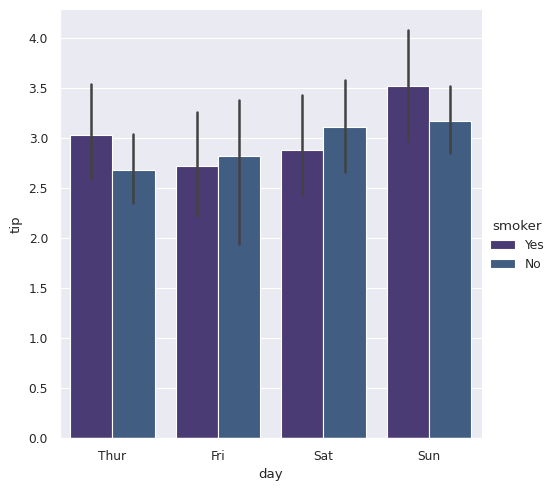

In [77]:
sns.catplot(data=df
           , x='day', y='tip'
           , hue='smoker'
           , kind='bar'
           , estimator=np.mean
           ,  
           )

# Multivariate views on complex datasets
Two key plots:
1. jointplot()
2. pairplot()

In [16]:
df4 = sns.load_dataset('penguins')
df4.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


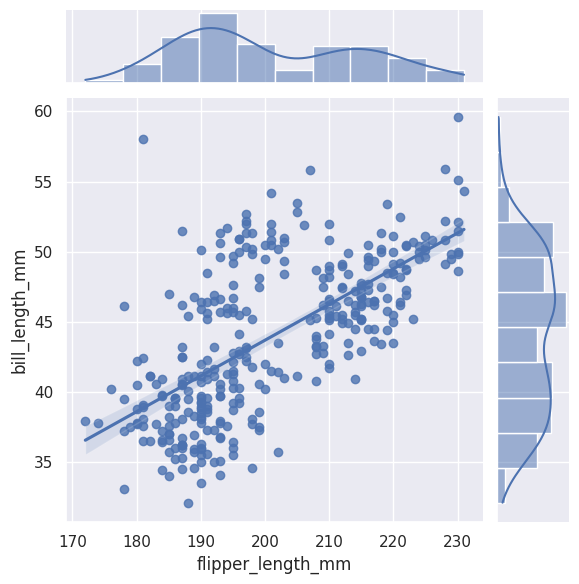

In [17]:
# A scatterplot with overlay pf distributions of both the variables in the scatterplot

sns.jointplot(data=df4
              , x='flipper_length_mm', y='bill_length_mm'
              # , hue='species'
              , kind='reg'
              ,
             )

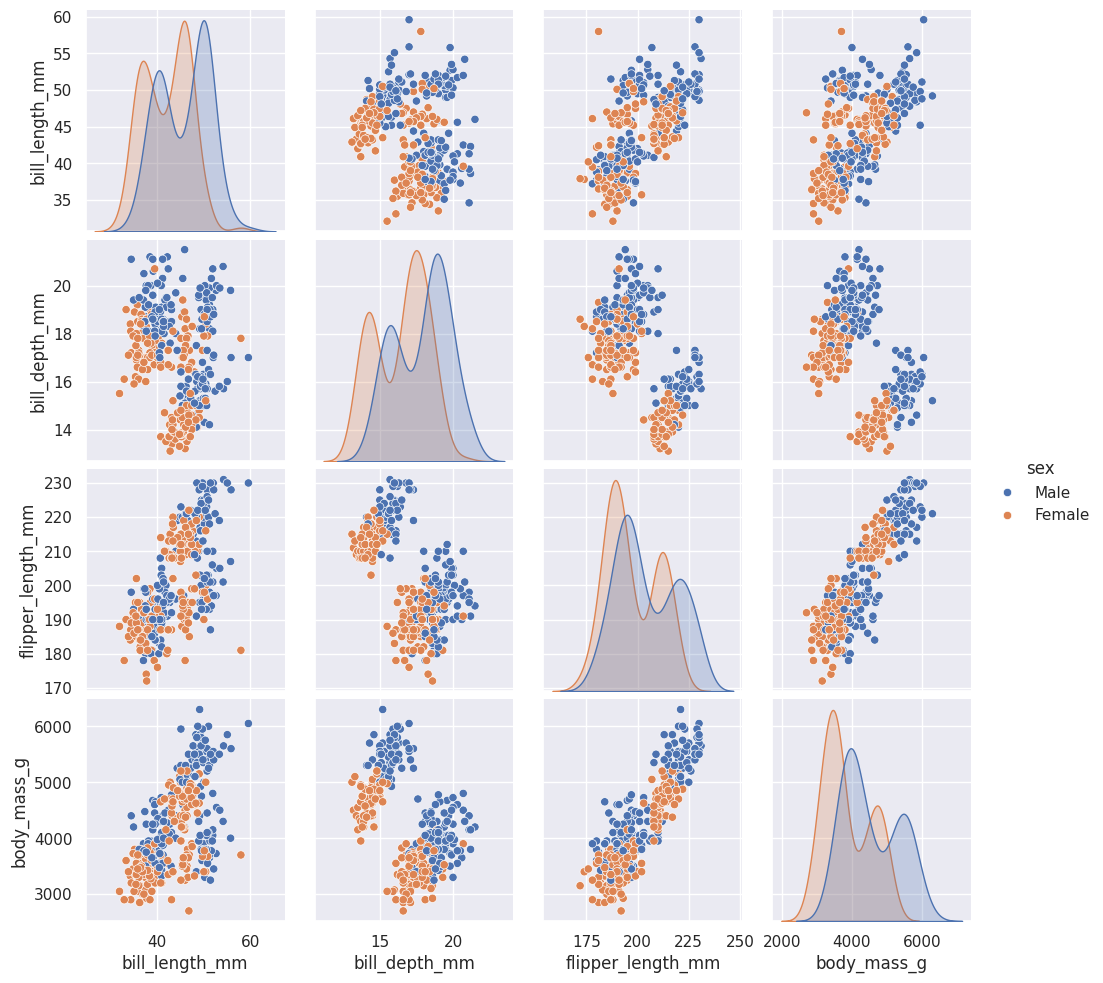

In [18]:
sns.pairplot(data=df4, diag_kind='kde', hue='sex')

## Creating Facetgrids in Seaborn

## Styling with Seaborn

In [58]:
# df4



<Figure size 800x400 with 0 Axes>

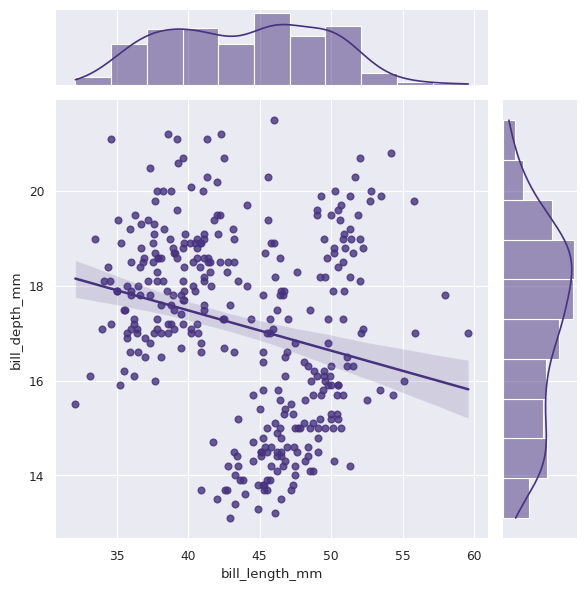

In [71]:
sns.set_theme(style='darkgrid', context='paper', palette='viridis')
plt.figure(figsize=(8,4))
g = sns.jointplot(data=df4
              , x='bill_length_mm', y='bill_depth_mm'
              , kind='reg'
              , 
             )
sns.despine(left=True, bottom=True, trim=False)

In [ ]:
df5 = sns.load_dataset('iris')